In [1]:
import pandas as pd
df = pd.read_csv('/home/joao/Downloads/dados-pi.csv', sep = ';', encoding = 'ISO-8859-1')

In [2]:
import pandas as pd
drivepath = '/content/drive/MyDrive/USP/5º Semestre/Estatistica/Trab/dados-pi.csv'
df = pd.read_csv(drivepath, sep = ';', encoding = 'ISO-8859-1')

<h1>Questão 15</h1>
<p>Qual sexo é mais sucetível a cura?</p>

In [45]:
#Questao 15

curados = df[df['evolucaoCaso'] == 'Cura']

In [4]:
sexo = curados.groupby('sexo')
sexo['ÿid'].count() 

sexo
Feminino      64259
Indefinido      602
Masculino     52489
Name: ÿid, dtype: int64

In [39]:
geralComEvolucaoFinal = df[df['evolucaoCaso'].notna()]
geralComEvolucaoFinalAgrupado = geralComEvolucaoFinal.groupby('sexo')
geralComEvolucaoFinalAgrupado['ÿid'].count()

sexo
Feminino      120700
Indefinido       606
Masculino      96398
Name: ÿid, dtype: int64

In [42]:
curadosFem = curados[curados['sexo'] == "Feminino"]
curadosMasc = curados[curados['sexo'] == "Masculino"]

FemComEvolucaoFinal = geralComEvolucaoFinal[geralComEvolucaoFinal['sexo'] == 'Feminino']
MascComEvolucaoFinal = geralComEvolucaoFinal[geralComEvolucaoFinal['sexo'] == 'Masculino']

print(f"Curados Femininos: {len(curadosFem)}. Curados Masculinos: {len(curadosMasc)}.\nTotal Feminino com evolução final de caso: {len(FemComEvolucaoFinal)}.  Total Masculino com evolução final de caso: {len(MascComEvolucaoFinal)}.")

print(f"Porcentagem de cura feminina: {len(curadosFem)/len(FemComEvolucaoFinal)*100}%.\nPorcentagem de cura masculina: {len(curadosMasc)/len(MascComEvolucaoFinal)*100}%.")

Curados Femininos: 64259. Curados Masculinos: 52489.
Total Feminino com evolução final de caso: 120700.  Total Masculino com evolução final de caso: 96398.
Porcentagem de cura feminina: 53.23860811930407%.
Porcentagem de cura masculina: 54.45029979875101%.


<h1 style = "color: blue">  Com isso chegamos às seguinte conclusões:

<h3> Para o sexo feminino, havendo uma quantia de 64259 pessoas curadas, num total de 120700 analisadas, tem-se uma porcentagem de <i>53.24%</i>

<h3>Para o sexo masculino, havendo uma quantia de 52489 pessoas curadas, num total de 96398 analisadas, tem-se uma porcentagem de <i>54.45%

<h1 style = "color: blue">  Análise dos resultados:

<h4> Á priori, pelos dados trabalhados infere-se que o sexo masculino é ligeiramente mais suscetível à se curar quando comparado com o sexo feminino.
    Entretanto, algumas variáveis devem ser analisadas. Sabemos que o COVID tem uma taxa de mortalidade por volta de 4%, como sugere estudos mais recentes. Contudo, nos dados estudados, apenas em torno de 50% se curaram.
    Com o valor encontrado, é pode-se afirmar que homens e mulheres são similarmente suscetíveis a se curarem.

<h1> Questão 34
    

In [2]:
testes = df.groupby('tipoTeste')
resultado = testes['ÿid'].count()
print(resultado)

tipoTeste
Enzimaimunoensaio  ELISA                                    33
Enzimaimunoensaio - ELISA IgM                               818
Imunoensaio por Eletroquimioluminescência  ECLIA           433
Imunoensaio por Eletroquimioluminescência - ECLIA IgG       478
Quimioluminescência - CLIA                                 1786
RT-PCR                                                    98499
TESTE RÁPIDO - ANTICORPO                                 372929
TESTE RÁPIDO - ANTÍGENO                                   93459
Name: ÿid, dtype: int64


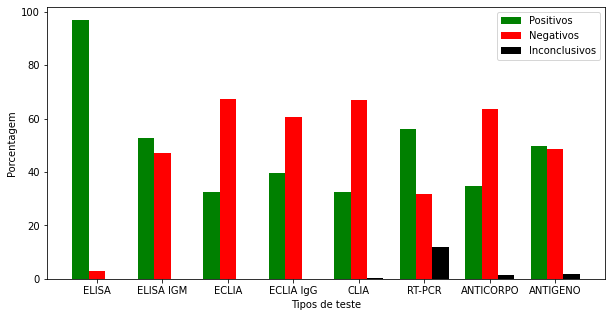

In [29]:
import matplotlib.pyplot as plt
import numpy as np


por_pos = []
por_neg = []
por_ind = []

maior = ''
for teste in testes.groups.keys():
    positivos = df[(df['tipoTeste'] == teste) & (df['resultadoTeste'] == 'Positivo')]
    negativos = df[(df['tipoTeste'] == teste) & (df['resultadoTeste'] == 'Negativo')]
    Inconclusivos = resultado[teste] - len(positivos) - len(negativos)
#     print('Tipo do teste: ', teste)
#     print('Positivados: ', len(positivos))
#     print('Negativados: ', len(negativos))
#     print("Inconclusivos: ", Inconclusivos)
#     print('Quantidade de testes: ', resultado[teste])
    por_pos.append(len(positivos)*100/resultado[teste])
    por_neg.append(len(negativos)*100/resultado[teste])
    por_ind.append(Inconclusivos*100/resultado[teste])
#     print('Porcentagem referente aos positivos: ', porcentagem)
#     print('Porcentagem referente aos negativos: ', len(negativos)/resultado[teste])
#     print('Porcentagem referente aos inconclusivos: ', Inconclusivos/resultado[teste])
    


plt.figure(figsize=(10,5))
barWidth = 0.25
r1 = np.arange(len(por_pos))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, por_pos, width = barWidth, label = 'Positivos', color = 'green')
plt.bar(r2, por_neg, width = barWidth, label = 'Negativos', color = 'red')
plt.bar(r3, por_ind, width = barWidth, label = 'Inconclusivos', color = 'black')

plt.xlabel('Tipos de teste')

teste_simple_names = ['ELISA', 'ELISA IGM', 'ECLIA', 'ECLIA IgG', 'CLIA', 'RT-PCR', 'ANTICORPO', 'ANTIGENO' ]
plt.xticks([r + barWidth for r in range(len(por_pos))], teste_simple_names )
plt.ylabel('Porcentagem')

plt.legend()
plt.show()
    #print()

<h1> Questão 29

In [ ]:
pregnant_rows =  [
  'Diabetes, Gestante',
  'Diabetes, Gestante de alto risco',
  'Doenças cardíacas crônicas, Diabetes, Gestante',
  'Doenças cardíacas crônicas, Gestante',
  'Doenças cardíacas crônicas, Gestante de alto risco',
  'Doenças respiratórias crônicas descompensadas, Diabetes, Portador de doenças cromossômicas ou estado de fragilidade imunológica, Imunossupressão, Gestante, Puérpera (até 45 dias do parto)',
  'Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Gestante de alto risco',
  'Doenças respiratórias crônicas descompensadas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Portador de doenças cromossômicas ou estado de fragilidade imunológica, Diabetes, Imunossupressão, Doenças cardíacas crônicas, Gestante',
  'Doenças respiratórias crônicas descompensadas, Gestante',
  'Doenças respiratórias crônicas descompensadas, Gestante de alto risco',
  'Gestante',
  'Gestante de alto risco',
  'Gestante de alto risco, Diabetes, Doenças cardíacas crônicas',
  'Gestante de alto risco, Doenças respiratórias crônicas descompensadas',
  'Gestante, Diabetes',
  'Gestante, Doenças cardíacas crônicas',
  'Gestante, Doenças respiratórias crônicas descompensadas',
  'Gestante, Imunossupressão',
  'Gestante, Obesidade',
  'Gestante, Obesidade, Doenças cardíacas crônicas',
  'Gestante, Puérpera (até 45 dias do parto)',
  'Imunossupressão, Gestante',
  'Obesidade, Gestante',
]

condition_rows = [
      'Internado',
      'Internado em UTI',
      'Óbito'            
]

In [ ]:
X = df[['sexo','idade','evolucaoCaso', 'condicoes']]
X = X[X['evolucaoCaso'].notna()]
X = X[X['condicoes'].notna()]
X = X[X['sexo'] =='Feminino']
X['Caso Grave'] = np.where((X.evolucaoCaso.isin(condition_rows)), 'Sim', 'Não')
X['Gravidez'] = np.where(X.condicoes.isin(pregnant_rows), 'Sim', 'Não')
X = X.drop(['evolucaoCaso'], axis=1 )
X = X.drop(['condicoes'], axis=1 )

In [ ]:
print('Quantidade de Mulheres registradas:', len(X))
gravidez = X['Gravidez'].value_counts().Sim
print('Quantidade de Mulheres Gravidas:', gravidez)
print('Quantidade de Mulheres Não Gravidas:', len(X)-gravidez)

Quantidade de Mulheres registradas: 12333
Quantidade de Mulheres Gravidas: 1418
Quantidade de Mulheres Não Gravidas: 10915


In [ ]:
y = X[X['Gravidez']=='Sim']
print('Mulheres Grávidas:', len(y))
graves = y['Caso Grave'].value_counts().Sim
print('Quantidade de Mulheres Grávidas com Casos Graves: ', graves)
print('Quantidade de Mulheres Grávidas com Casos Graves: ', len(y) - graves)
print('Porcentagem Referente aos Casos Graves para Mulheres Grávidas', graves/(len(y)))

Mulheres Gravidas: 1418
Quantidade de Mulheres Gravidas com Casos Graves:  23
Quantidade de Mulheres Gravidas com Casos Graves:  1395
Porcentagem Referente aos Casos Graves para Mulheres Grávidas 0.01622002820874471


In [ ]:
y = X[X['Gravidez']=='Não']
print('Mulheres não Grávidas:',len(y))
graves = y['Caso Grave'].value_counts().Sim
print('Quantidade de Mulheres Não Grávidas com Casos Graves: ', graves)
print('Quantidade de Mulheres Não Grávidas com Casos Graves: ', len(y) - graves)
print('Porcentagem Referente aos Casos Graves para Mulheres Não Grávidas', graves/(len(y)))

Mulheres não Grávidas: 10915
Quantidade de Mulheres Não Grávidas com Casos Graves:  292
Quantidade de Mulheres Não Grávidas com Casos Graves:  10623
Porcentagem Referente aos Casos Graves para Mulheres Não Grávidas 0.02675217590471828


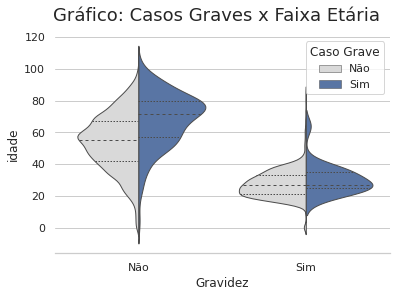

In [ ]:
import matplotlib.pyplot as plt
plt.suptitle("Gráfico: Casos Graves x Faixa Etária", size = 18)
sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=X, x="Gravidez", y="idade", hue="Caso Grave",
               split=True, inner="quart", linewidth=1,
               palette={"Sim": "b", "Não": ".85"}
               )
sns.despine(left=True)

<h1 style = "color: blue">  Análise dos resultados:

<h4> Por meio do gráfico acima é possivel realizar um paralelo entre os casos graves de mulheres gestantes e não gestantes. É perceptível um número mais elevado de casos graves na faixa de 20-40 anos entre as mulheres grávidas. Além disso, é possível perceber que nas mulheres não grávidas a chance de ser considera um caso grave ocorre na faixa dos 60-80 anos. 